In [1]:
import plotly.express as px
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_data_cleaned1.csv')

In [3]:
df.head()

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,SQL,AWS,Excel,GCP,Azure,Spark,PyTorch,TensorFlow,Tableau,Keras
0,3.8,Tecolote Research,NM,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,0,0,1,0,0,0,0,0,1,0
1,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,0,0,0,0,0,0,0,1,0,0
2,4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,1,0,1,0,0,1,0,1,0,0
3,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,0,0,0,0,0,0,0,0,0,0
4,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,1,0,1,0,0,0,0,0,0,0


In [4]:
## Visualisation

In [5]:
df.columns

Index(['Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'glassdoor est', 'min_salary', 'max_salary', 'avg_salary', 'Age', 'Job',
       'Seniority', 'Python', 'R', 'SQL', 'AWS', 'Excel', 'GCP', 'Azure',
       'Spark', 'PyTorch', 'TensorFlow', 'Tableau', 'Keras'],
      dtype='object')

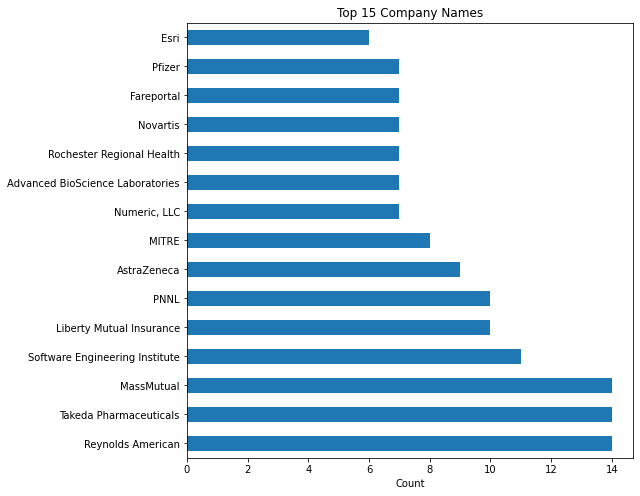

In [6]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

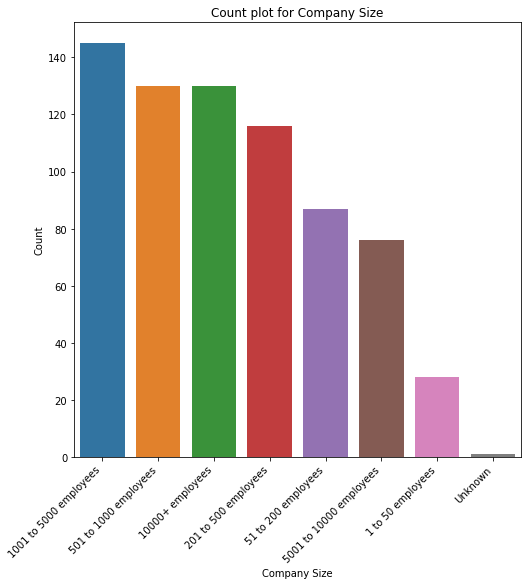

In [7]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

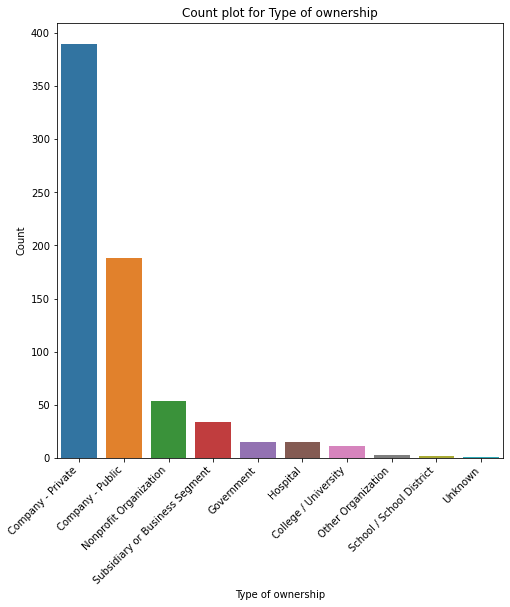

In [8]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

Observation:
    we have around 380 private companies in our dataset followed by public comopanies whose count revoles around 180-200

In [9]:
pd.pivot_table(df, index = ['Job','Seniority'], values = 'avg_salary')

avg_salary
Job                       Seniority                
analyst                   Not Specified   60.932432
                          jr              56.000000
                          senior          80.111111
data engineer             Not Specified   96.075000
                          senior         118.406250
data science related jobs Not Specified   78.808333
                          senior         108.264151
data scientist            Not Specified  106.767956
                          jr             106.000000
                          senior         135.906977
director                  Not Specified  168.428571
manager                   Not Specified   83.681818
mle                       Not Specified  119.066667
                          senior         142.000000

In [10]:
### salary vs ratings,sector,revenue,number of comp,python,r,spark,aws,excel,desc length
df_pivots = df[['Rating', 'Industry', 'Revenue','Company Name','Competitors', 'Python', 'R',
       'SQL', 'AWS', 'Excel', 'GCP', 'Azure', 'Spark', 'PyTorch', 'TensorFlow',
       'Tableau', 'Keras','avg_salary']]

In [11]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.5    119.500000
 4.5    117.428571
 3.9    114.483871
-1.0    110.000000
 2.6    108.916667
 4.4    108.303030
 3.3    107.805556
 4.0    107.595745
 3.2    107.114286
 3.7    105.949153
 3.5    104.571429
 4.7    103.612903
 5.0    101.000000
 4.3    100.586207
 4.1     99.562500
 2.2     97.500000
 3.8     97.377049
 4.6     97.100000
 2.1     95.400000
 4.2     94.640000
 3.4     93.095238
 3.6     91.152174
 1.9     87.000000
 3.1     86.200000
 2.7     85.714286
 3.0     85.294118
 2.8     83.571429
 2.3     81.500000
 2.9     80.944444
 4.8     80.000000
 2.4     59.714286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.000000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.000000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [12]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 58
IT Services                                  47
Health Care Services & Hospitals             47
Enterprise Software & Network Solutions      40
Consulting                                   28
Internet                                     26
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       18
Colleges & Universities                      14
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Lending                                       8
Financial Analytics & Research                8
Travel Agencies                               8
Food & Beverage Manufacturing           

In [13]:
df['Sector'].value_counts()

Information Technology              171
Biotech & Pharmaceuticals           112
Business Services                    95
Insurance                            69
Health Care                          47
Finance                              42
Manufacturing                        34
Aerospace & Defense                  25
Education                            21
Retail                               15
Oil, Gas, Energy & Utilities         14
Government                           11
Non-Profit                            9
Travel & Tourism                      8
Transportation & Logistics            8
Telecommunications                    6
Media                                 6
Real Estate                           5
Arts, Entertainment & Recreation      4
Consumer Services                     4
Mining & Metals                       3
-1                                    2
Agriculture & Forestry                1
Accounting & Legal                    1
Name: Sector, dtype: int64

• Trimming Columns

Features having more than 10 categories are trimmed so as to reduce the dimensionality.

In [14]:
# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
    
    if text not in sector_list:
        return 'Others'
    else:
        return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

In [15]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['Location'].value_counts()[:9].index)

def job_location_simplifier(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text

df['Location'] = df['Location'].apply(job_location_simplifier)

In [16]:
df.head()

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,SQL,AWS,Excel,GCP,Azure,Spark,PyTorch,TensorFlow,Tableau,Keras
0,3.8,Tecolote Research,Others,CA,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,0,0,1,0,0,0,0,0,1,0
1,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,0,0,0,0,0,0,0,1,0,0
2,4.8,KnowBe4,Others,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,1,0,1,0,0,1,0,1,0,0
3,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,Others,$500 million to $1 billion (USD),...,0,0,0,0,0,0,0,0,0,0
4,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,1,0,1,0,0,0,0,0,0,0


In [17]:
df.columns

Index(['Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'glassdoor est', 'min_salary', 'max_salary', 'avg_salary', 'Age', 'Job',
       'Seniority', 'Python', 'R', 'SQL', 'AWS', 'Excel', 'GCP', 'Azure',
       'Spark', 'PyTorch', 'TensorFlow', 'Tableau', 'Keras'],
      dtype='object')

In [18]:
df['Seniority'].value_counts()

Not Specified    506
senior           205
jr                 2
Name: Seniority, dtype: int64

## • Handling ordinal categorical features
Ordinal features are categorical variables that have some order associated with them (e.g. size, rating, remark, etc.)

In [19]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['Size'] = df['Size'].map(size_map)

In [20]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['Revenue'] = df['Revenue'].map(revenue_map)

In [21]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'Not Specified': 0, 'jr': 1, 'senior': 2}

df['Seniority'] = df['Seniority'].map(job_seniority_map)

# • Handling nominal categorical features
Nominal features are categorical variables that have no numerical importance (e.g. occupation, name, etc.)

In [22]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['Type of ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))


Before: (713, 30)
After: (713, 39)


In [23]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['Sector'], data=df)
print('After: {}'.format(df.shape))

Before: (713, 39)
After: (713, 49)


In [24]:

# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['Job'], data=df)
print('After: {}'.format(df.shape))

Before: (713, 49)
After: (713, 55)


In [25]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization'], axis=1, inplace=True)

In [26]:
df.head()

,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,Revenue,Competitors,glassdoor est,...,Sector_Manufacturing,Sector_Others,Sector_Retail,Job_analyst,Job_data engineer,Job_data science related jobs,Job_data scientist,Job_director,Job_manager,Job_mle
0,3.8,Tecolote Research,Others,CA,4,1973,Aerospace & Defense,6,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3.4,University of Maryland Medical System,MD,MD,7,1984,Health Care Services & Hospitals,10,1,1,...,0,0,0,0,0,0,1,0,0,0
2,4.8,KnowBe4,Others,FL,4,2010,Security Services,7,1,1,...,0,0,0,0,0,0,1,0,0,0
3,3.8,PNNL,WA,WA,5,1965,Energy,8,3,1,...,0,1,0,0,0,0,1,0,0,0
4,2.9,Affinity Solutions,NY,NY,2,1998,Advertising & Marketing,0,3,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df.drop(labels=[ 'Company Name', 'Location','Headquarters', 'Industry','glassdoor est','min_salary','max_salary','Founded'], axis=1, inplace=True)

In [28]:
df.head()

,Rating,Size,Revenue,Competitors,avg_salary,Age,Seniority,Python,R,SQL,...,Sector_Manufacturing,Sector_Others,Sector_Retail,Job_analyst,Job_data engineer,Job_data science related jobs,Job_data scientist,Job_director,Job_manager,Job_mle
0,3.8,4,6,1,72,47,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3.4,7,10,1,87,36,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.8,4,7,1,85,10,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,3.8,5,8,3,76,55,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2.9,2,0,3,114,22,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

C:\Users\Win11\AppData\Local\Temp\ipykernel_10956\1453288898.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


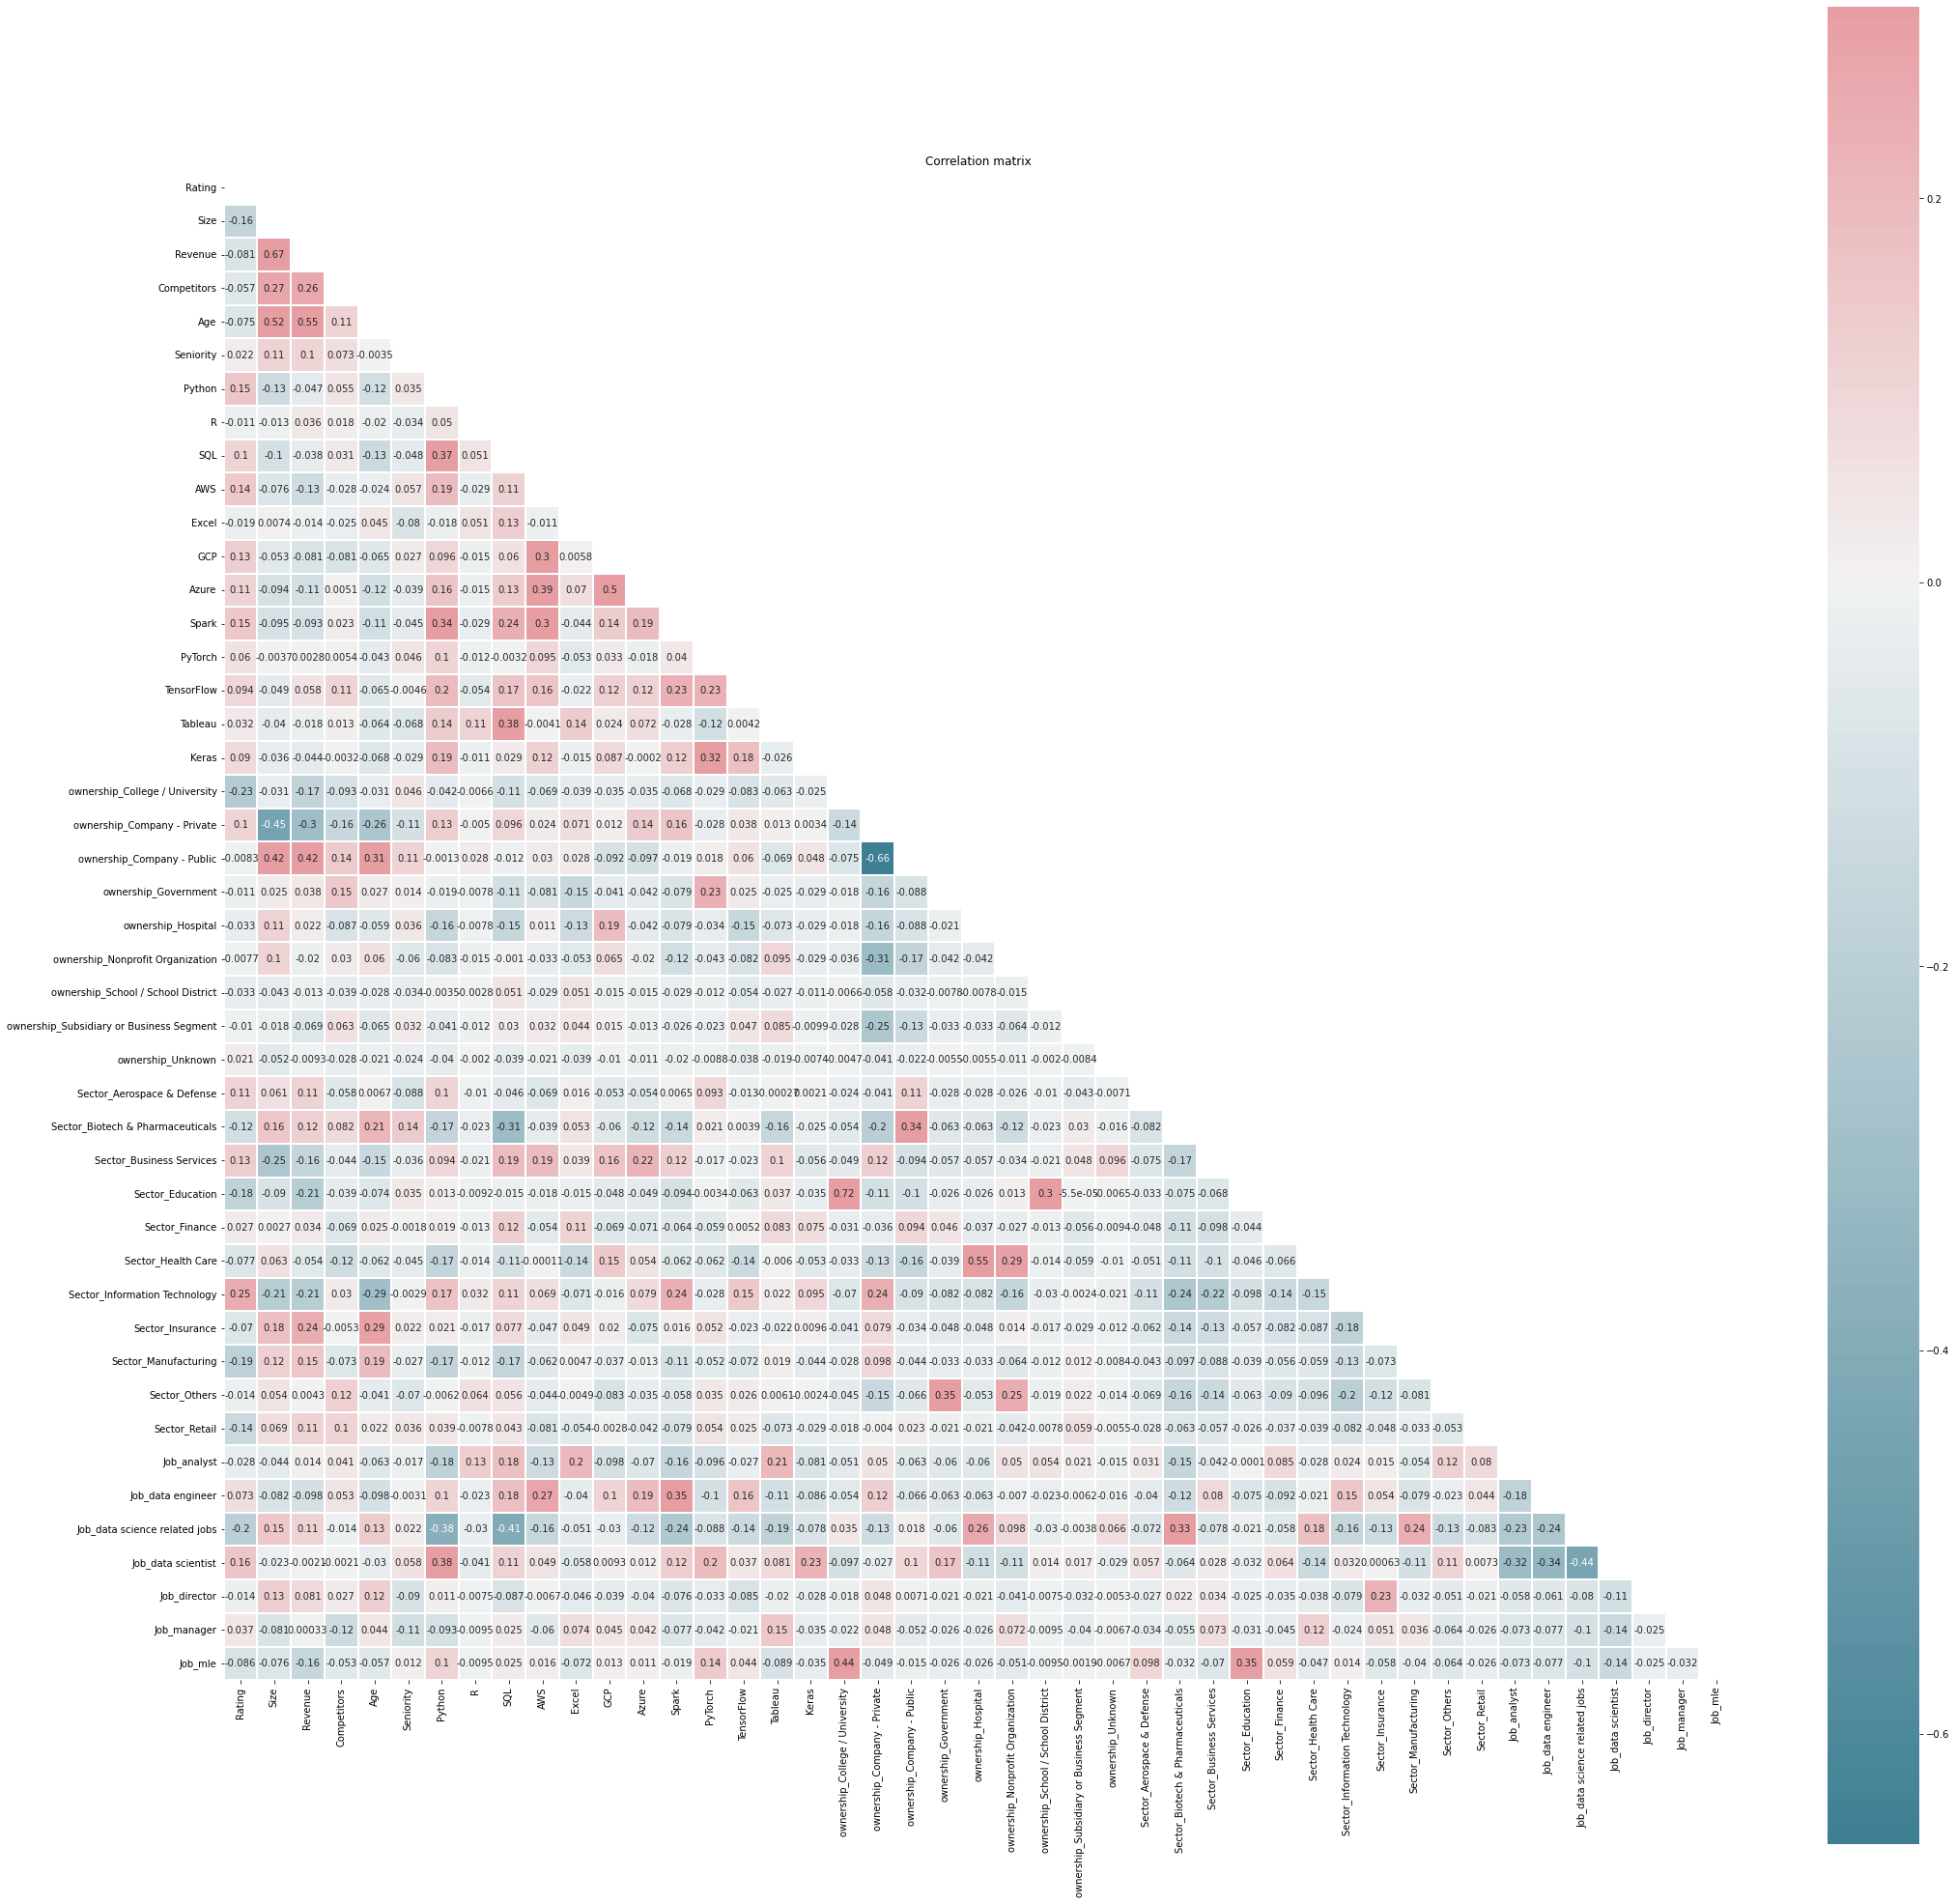

In [30]:
# Finding and plotting the correlation matrix for top20 features
import numpy as np
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(35, 35))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

### Range of correlation are as follows:


     1.Strong correlation: X > 0.7
     2.Moderate correlation: 0.5 < X < 0.7
     3.Weak correlation: X < 0.5

In [31]:
def correlation(dataset,threshold):
    col_corr = set()##set of all the names of correalted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#we are interested in absolute coeff value
                colname = corr_matrix.columns[i]##getting the name column
                col_corr.add(colname)
                
    return col_corr  

In [32]:
corr_features = correlation(X , 0.6)
len(set(corr_features))

3

In [33]:
X.drop(corr_features ,axis = 1,inplace = True)

In [34]:
X.drop(labels = ['R','Keras'],axis = 1,inplace=True)


In [35]:
X.drop(labels = ['PyTorch','ownership_College / University','ownership_Government','ownership_Hospital','ownership_School / School District','Sector_Insurance','Sector_Manufacturing','Sector_Retail'],axis = 1,inplace=True)

In [36]:
X.drop(labels = 'ownership_Unknown',axis = 1,inplace = True)

In [37]:
X.head()

,Rating,Size,Competitors,Age,Seniority,Python,SQL,AWS,Excel,GCP,...,Sector_Health Care,Sector_Information Technology,Sector_Others,Job_analyst,Job_data engineer,Job_data science related jobs,Job_data scientist,Job_director,Job_manager,Job_mle
0,3.8,4,1,47,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,3.4,7,1,36,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,4.8,4,1,10,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3.8,5,3,55,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2.9,2,3,22,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['Rating'] = sc_rating.fit_transform(X[['Rating']])

sc_founded = StandardScaler()
X['Age'] = sc_founded.fit_transform(X[['Age']])

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 43)

In [40]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

Feature Scaling
Scaling features using StandardScaler library

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10))

-21.398181681227165

In [42]:

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10))

-21.16798249972936

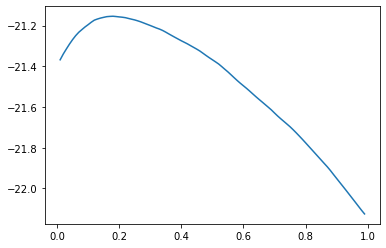

In [43]:

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)))
    
plt.plot(alpha,error)

In [44]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
17,0.18,-21.154379


In [45]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))

-15.173073498556997

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=5)
gs.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [47]:
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,tpred_rf)

15.148980279844768

In [48]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, tpred_rf), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, tpred_rf), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, tpred_rf), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, tpred_rf), 2)) 
print("R2 score =", round(sm.r2_score(y_test, tpred_rf), 2))

Mean absolute error = 15.15
Mean squared error = 456.52
Median absolute error = 13.1
Explain variance score = 0.6
R2 score = 0.58


In [51]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# evaluate on the test dataset
gb.fit(X_train,y_train)
# R-squared scores


--- Average NRMSE: -24.541 ---
Standard Deviation: 3.509


GradientBoostingRegressor()

In [53]:
tpred_rf1 = gb.predict(X_test)

In [54]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, tpred_rf1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, tpred_rf1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, tpred_rf1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, tpred_rf1), 2)) 
print("R2 score =", round(sm.r2_score(y_test, tpred_rf1), 2))

Mean absolute error = 18.46
Mean squared error = 561.17
Median absolute error = 15.99
Explain variance score = 0.5
R2 score = 0.49


In [66]:
y_test

268    128
618     80
567    138
476     68
580    115
      ... 
145     61
488    194
230     61
672    140
446     49
Name: avg_salary, Length: 214, dtype: int64

In [65]:
tpred_rf1.reshape(1,-1)[0]

array([103.0180034 ,  77.56738718, 120.42385019, 106.55253983,
       147.50566442,  86.36717983, 118.2588338 ,  73.90070514,
        90.80194755,  87.8169327 ,  79.83650034,  97.98182795,
       128.30679668, 138.64315701,  94.62113926, 143.29420676,
        72.53741529,  71.02009509, 115.43223346,  66.93238419,
       101.19916343,  77.20235158, 130.32726378,  92.22222483,
       144.55594543,  65.20187909,  63.47328408, 103.95242992,
        78.67368102, 136.71707153, 109.8912951 , 128.79572643,
       107.25769191, 117.74723676,  78.96314504, 132.49532945,
        95.87508783,  80.68351261,  78.62554519,  69.74500966,
       117.67217309,  94.71383   , 128.88824281, 143.29420676,
       100.60926151,  54.19409743,  70.03424702,  92.68733583,
       102.23369591,  93.93389446, 106.66651511,  99.69504917,
       108.2359403 ,  96.43498059, 120.57228696, 106.42856738,
       103.95242992, 119.33517095,  99.56281956, 147.50566442,
        87.97793204,  63.8533931 , 100.60537706, 144.81

In [67]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [68]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


81.00454545454545

In [76]:
best = compare_models(sort='RMSE')

NameError: name 'compare_models' is not defined

In [83]:
from py

reg = setup(
    data=data, 
    target='charges', 
    train_size=0.8, 
    session_id=10,
    normalize=True, 
    transform_target=True
)

ModuleNotFoundError: No module named 'pycaret'

In [78]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pycaret

Defaulting to user installation because normal site-packages is not writeable


In [81]:
pip install git+https://github.com/pycaret/pycaret.git#egg=pycaret

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/pycaret/pycaret.git to c:\users\win11\appdata\local\temp\pip-install-1s0zg5uf\pycaret_69a56e9f34ad4993afef3c28e1cc45cd
  Resolved https://github.com/pycaret/pycaret.git to commit 9ca12a1eb19683508f8c2d9f03fe22fdfbb0f0f7
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/pycaret/pycaret.git 'C:\Users\Win11\AppData\Local\Temp\pip-install-1s0zg5uf\pycaret_69a56e9f34ad4993afef3c28e1cc45cd'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc3 requires sktime~=0.11.4, but you have sktime 0.13.0 which is incompatible.


  Attempting uninstall: sktime
    Found existing installation: sktime 0.11.4
    Uninstalling sktime-0.11.4:
      Successfully uninstalled sktime-0.11.4


In [84]:
sklearn --version

NameError: name 'sklearn' is not defined